In [0]:
import tensorflow as tf

In [81]:
tf.__version__

'2.0.0'

In [82]:
!pip install --upgrade tensorflow==2.0.0

Requirement already up-to-date: tensorflow==2.0.0 in /usr/local/lib/python3.6/dist-packages (2.0.0)


In [83]:
!pip install --upgrade grpcio

Requirement already up-to-date: grpcio in /usr/local/lib/python3.6/dist-packages (1.25.0)


In [0]:
import tensorflow as tf

In [85]:
tf.__version__

'2.0.0'

In [0]:
import tensorflow_datasets as tfds

### Importing Malaria dataset

In [0]:
mal_data = tfds.load('malaria')

In [0]:
mal_data = tfds.as_numpy(mal_data)

In [89]:
len(mal_data)

1

In [90]:
type(mal_data)

dict

In [91]:
mal_data.keys()

dict_keys(['train'])

In [92]:
mal_data.values()

dict_values([<generator object _eager_dataset_iterator at 0x7f6dfc76c570>])

In [0]:
mal_data_npy = mal_data['train']

In [94]:
type(mal_data_npy)

generator

In [95]:
for i in mal_data_npy:
  temp = i
  print(i)
  break

{'image': array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 'label': 1}


In [0]:
feature_list = []
label_list = []
for i in mal_data_npy:
  feature_list.append(i['image'])
  label_list.append(i['label'])

In [97]:
len(feature_list)

27557

In [0]:
feature_list.append(temp['image'])
label_list.append(temp['label'])

In [99]:
len(label_list)

27558

#### Plotting

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

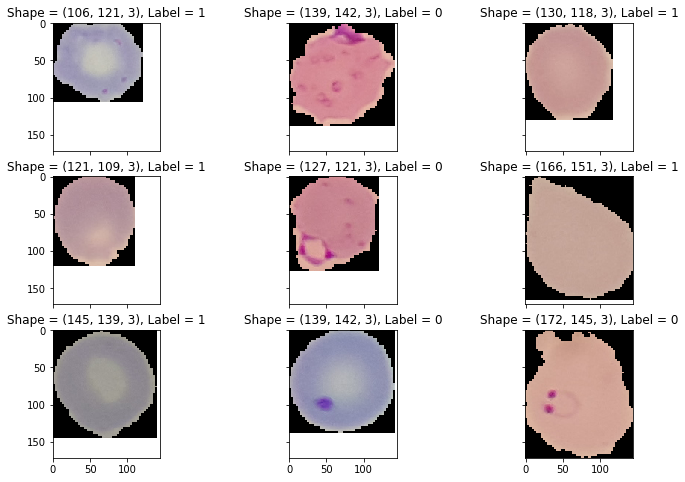

In [101]:
fig1, ax1 = plt.subplots(3,3, sharex=True, sharey=True, figsize = (12,8))
ax1 = ax1.flatten()
for i,j,k in zip(range(len(ax1)), feature_list, label_list):
  ax1[i].imshow(j)
  ax1[i].set_title('Shape = ' + str(j.shape) + ', Label = ' + str(k))
plt.show()

  * Different input sizes but all with 3 channels

### Data Preprocessing

In [0]:
import numpy as np

In [0]:
feature_list = np.array(feature_list)

In [106]:
feature_list[0].shape

(106, 121, 3)

In [0]:
label_list = np.array(label_list)

In [0]:
label_list = label_list.astype('uint8')

#### Checking the image size (height, width) distribution

In [0]:
shape_list = []
for i in feature_list:
  shape = i.shape
  shape_list.append([shape[0], shape[1]])

shape_list = np.array(shape_list)

In [120]:
shape_list.shape

(27558, 2)

In [122]:
min_shape_val = np.min(shape_list, axis=0)
min_shape_val

array([40, 46])

In [123]:
max_shape_val = np.max(shape_list, axis=0)
max_shape_val

array([385, 394])

In [124]:
mean_shape_val = np.mean(shape_list, axis=0)
mean_shape_val

array([132.98345308, 132.48715437])

In [125]:
std_shape_val = np.std(shape_list, axis=0)
std_shape_val

array([20.61927562, 20.01558555])

In [126]:
median_shape_val = np.median(shape_list, axis=0)
median_shape_val

array([130., 130.])

  * Since the standard deviation is not too high, the mean size of the image size can be used to resize all the images to one standard size

In [1]:
resize = np.round(mean_shape_val).astype('uint8')
resize

NameError: ignored

In [0]:
resized_feature_list = []
for i in feature_list:
  resized_feature_list.append(tf.image.resize_with_pad(i, resize[0], resize[1], method = 'lanczos3', antialias=True))

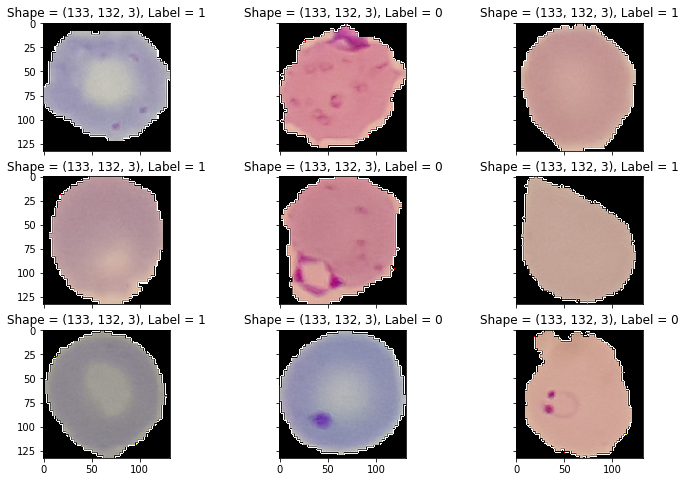

In [0]:
fig2, ax2 = plt.subplots(3,3, sharex=True, sharey=True, figsize = (12,8))
ax2 = ax2.flatten()
for i,j,k in zip(range(len(ax2)), resized_feature_list, label_list):
  ax2[i].imshow(tf.cast(j, 'uint8')) # plt.imshow clips input data to range [0,255] for integers
  ax2[i].set_title('Shape = ' + str(j.shape) + ', Label = ' + str(k))
plt.show()

### Creating TF dataset for training

#### Shuffling the data before splitting into training, validation and test in the ratio 0.8,0.1,0.1

In [0]:
# concat_data = np.concatenate((feature_list.reshape(-1,1), label_list.reshape(-1,1)), axis=1)
# concat_data.shape

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
random_seed = 100

In [0]:
x_train, x_test, y_train, y_test = train_test_split(feature_list, label_list, test_size=0.1, shuffle = True, 
                                                    random_state=random_seed, stratify = label_list)

In [154]:
x_train.shape

(24802,)

In [155]:
x_test.shape

(2756,)

In [157]:
# validation size will be
1/9

0.1111111111111111

In [0]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.11, shuffle = True, 
                                                    random_state=random_seed, stratify = y_train)

In [159]:
x_train.shape

(22073,)

In [176]:
x_valid.shape

(2729,)

#### Creating a tf.data dataset

In [0]:
input_label = 'image'
output_label = 'disease_label'

##### Need to resize all to the same shape, else, cannot create a Dataset

In [190]:
resized_features_list[1].numpy().flatten().min()

-49.249084

In [167]:
x_train[0].shape

(130, 118, 3)

In [168]:
x_train[0].dtype

dtype('uint8')